In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_json('Sarcasm_Dataset.json',lines = True)

In [ ]:
df = data.drop('article_link', axis = 1)

In [ ]:
counts = df['is_sarcastic'].value_counts().reset_index()
counts.columns = ['is_sarcastic', 'count']
print(counts)

   is_sarcastic  count
0             0  14985
1             1  13634


# Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import spacy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma not in stopwords.words('english')]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text

In [ ]:
cleaned_text = []
for text in df.headline:
    processedtext = preprocess(text)
    cleaned_text.append(processedtext)
df['clean_text'] = cleaned_text

In [ ]:
df.head()

,is_sarcastic,headline,clean_text
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientist unveil doomsday cloc...
1,0,dem rep. totally nails why congress is falling...,dem rep totally nail congress fall short gende...
2,0,eat your veggies: 9 deliciously different recipes,eat veggie deliciously different recipe
3,1,inclement weather prevents liar from getting t...,inclement weather prevent liar get work
4,1,mother comes pretty close to using word 'strea...,mother come pretty close use word stream corre...


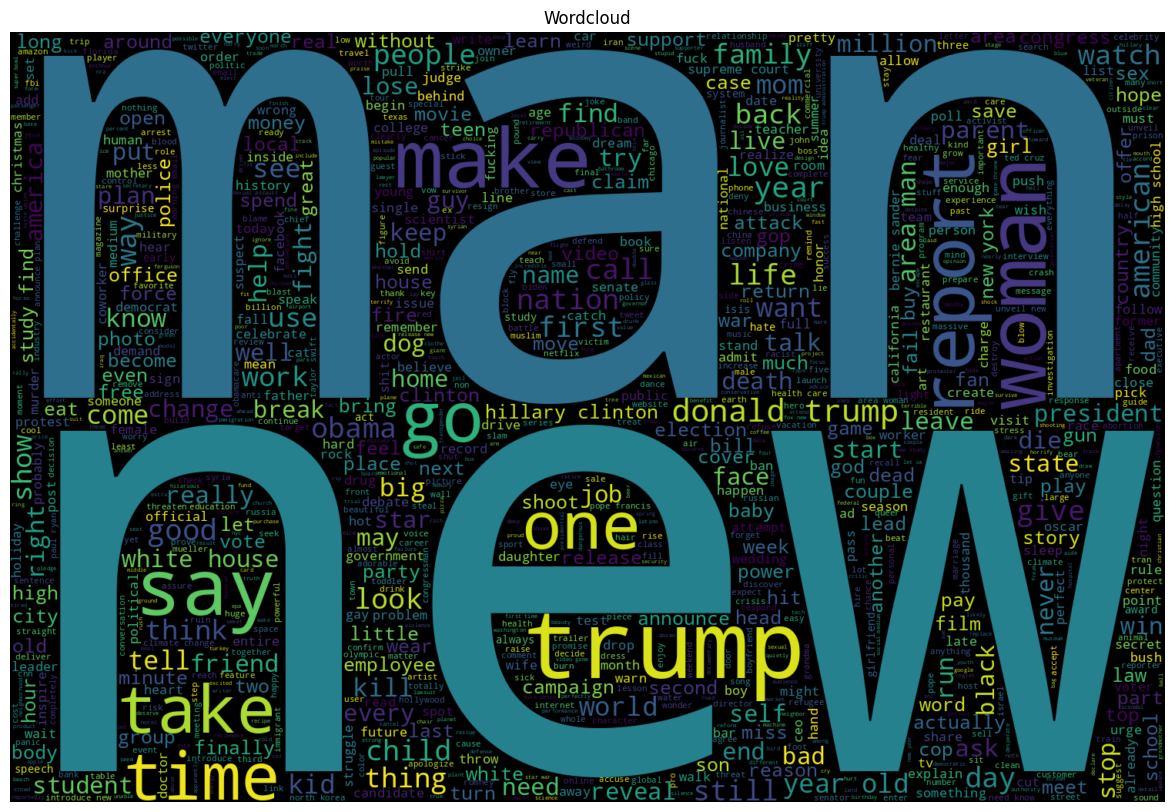

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,10))
wc = WordCloud(width = 1500,height = 1000,max_words = 1000).generate(' '.join(word for word in df.clean_text))
plt.axis("off")
plt.title('Wordcloud')
plt.imshow(wc , interpolation = 'bilinear')

# Model Building

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = df.clean_text
y = df.is_sarcastic

In [ ]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [ ]:
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_tfidf_train = tfidf.fit_transform(X_train.tolist())
X_tfidf_test = tfidf.transform(X_test.tolist())

## Logistic Regression

In [ ]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_tfidf_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred_lr = lr.predict(X_tfidf_test)
print_metrices(y_pred_lr,y_test)

[[3562  998]
 [ 887 3139]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      4560
           1       0.76      0.78      0.77      4026

    accuracy                           0.78      8586
   macro avg       0.78      0.78      0.78      8586
weighted avg       0.78      0.78      0.78      8586

Accuracy :  0.780456557186117
Precison :  0.7804377044539487
Recall :  0.780456557186117
F1 :  0.7803163864244811


## Naive Bayes

In [ ]:
clf_nb = MultinomialNB()
clf_nb.fit(X_tfidf_train,y_train)
y_pred_nb = clf_nb.predict(X_tfidf_test)
print_metrices(y_pred_nb,y_test)

[[3888  672]
 [1103 2923]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      4560
           1       0.81      0.73      0.77      4026

    accuracy                           0.79      8586
   macro avg       0.80      0.79      0.79      8586
weighted avg       0.79      0.79      0.79      8586

Accuracy :  0.7932681108781737
Precison :  0.7996232163768878
Recall :  0.7932681108781737
F1 :  0.7944493865234171


## Linear SVC

In [ ]:
linearsvc =  LinearSVC(C= 10,random_state=0,class_weight='balanced')
linearsvc.fit(X_tfidf_train,y_train)
y_pred_linearsvc = linearsvc.predict(X_tfidf_test)
print_metrices(y_pred_linearsvc,y_test)

[[3650  910]
 [ 869 3157]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      4560
           1       0.78      0.78      0.78      4026

    accuracy                           0.79      8586
   macro avg       0.79      0.79      0.79      8586
weighted avg       0.79      0.79      0.79      8586

Accuracy :  0.7928022361984626
Precison :  0.7927244689923018
Recall :  0.7928022361984626
F1 :  0.7927452370610433


## SVC

In [ ]:
svc =  SVC(C= 10,random_state=0,class_weight='balanced')
svc.fit(X_tfidf_train,y_train)
y_pred_svc = svc.predict(X_tfidf_test)
print_metrices(y_pred_svc,y_test)

[[3723  837]
 [ 927 3099]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4560
           1       0.79      0.77      0.78      4026

    accuracy                           0.79      8586
   macro avg       0.79      0.79      0.79      8586
weighted avg       0.79      0.79      0.79      8586

Accuracy :  0.7945492662473794
Precison :  0.7950387916312917
Recall :  0.7945492662473794
F1 :  0.7947066112638892


# Evaluation

In [ ]:
acc_table = {
    'Logistic Regression' : accuracy_score(y_pred_lr,y_test),
    'Naive Bayes' : accuracy_score(y_pred_nb,y_test),
    'Linear SVC' : accuracy_score(y_pred_linearsvc,y_test),
    'SVC' : accuracy_score(y_pred_svc,y_test)
}

In [ ]:
acc_df = pd.DataFrame(acc_table.items(),columns = ['Model','Accuracy'])

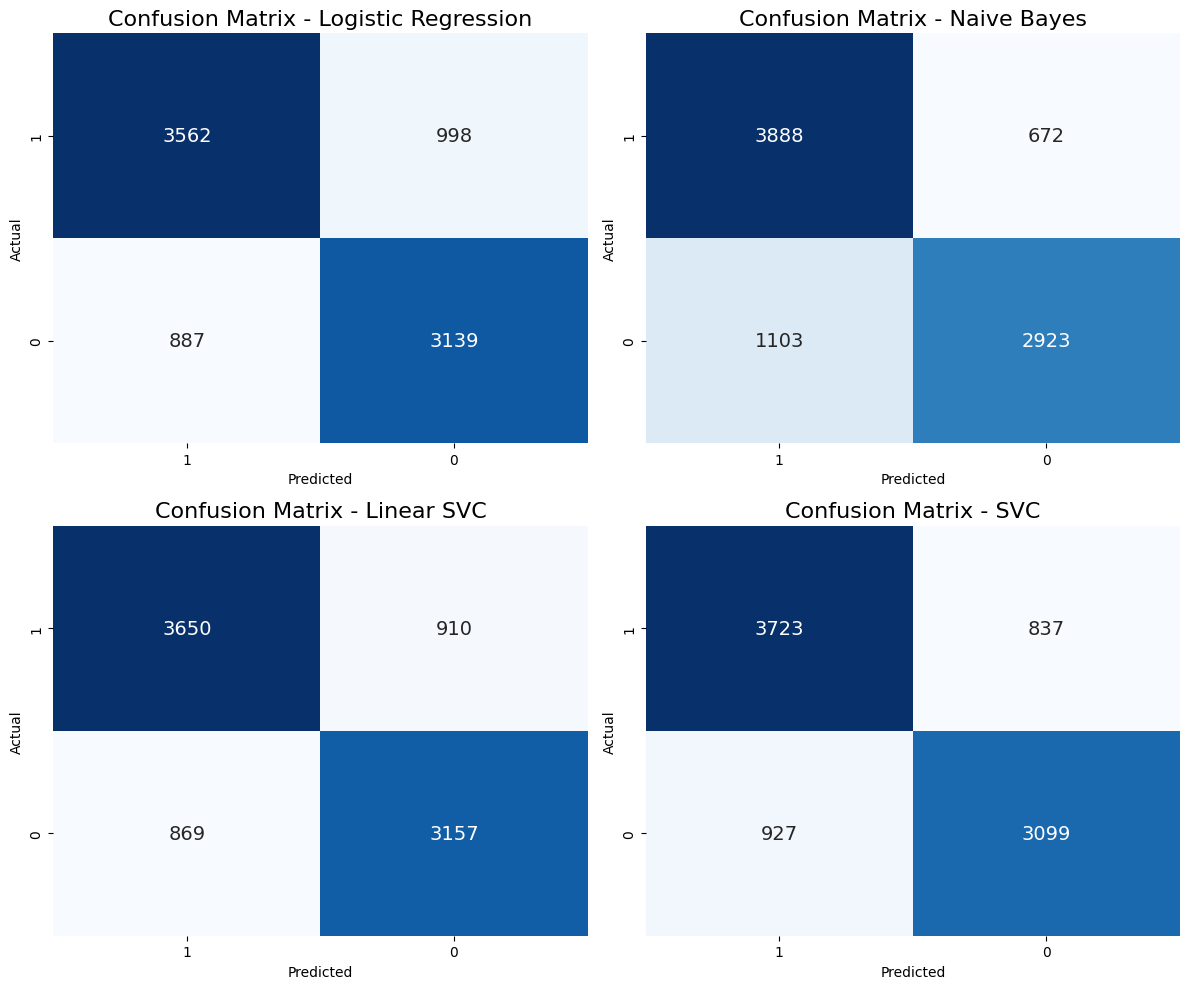

In [ ]:
models = ['Logistic Regression', 'Naive Bayes', 'Linear SVC', 'SVC']
confusion_matrices = [confusion_matrix(y_test, y_pred_lr),
                      confusion_matrix(y_test, y_pred_nb),
                      confusion_matrix(y_test, y_pred_linearsvc),
                      confusion_matrix(y_test, y_pred_svc)]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (model, cm) in enumerate(zip(models, confusion_matrices)):
    ax = axes[i // 2, i % 2]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14},
                xticklabels=df.is_sarcastic.unique(), yticklabels=df.is_sarcastic.unique(), ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix - {model}', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes', 'Linear SVC', 'SVC'],
    'Accuracy': [accuracy_score(y_pred_lr,y_test).round(4), accuracy_score(y_pred_nb,y_test).round(4) , accuracy_score(y_pred_linearsvc,y_test).round(4), accuracy_score(y_pred_svc,y_test).round(4)]})

models.sort_values(by='Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

,Model,Accuracy
0,SVC,0.7945
1,Naive Bayes,0.7933
2,Linear SVC,0.7928
3,Logistic Regression,0.7805
